## Predicting Wine Quality using Machine Learning.

we're going to take following approch:

1. Data Extraction
2. Data Analysis
3. Data Interpretation and Representation.
4. Data Preprocessing
    * Data Cleaning
    * Outlier Detection
    * Feature Scaling 
    * Feature Selection
5. Model Selection
6. Model Evaluation
7. Deployement.

In [1]:
#Importing Required libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

#plot style.
plt.style.use('seaborn')

# Data Extraction

In [2]:
#Loading the data into dataframe.
df = pd.read_csv('winequality-red.csv')

#Having a look at the data.
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


This data frame contains the following columns:

Input variables (based on physicochemical tests):\
1 - fixed acidity: most acids involved with wine or fixed or nonvolatile (do not evaporate readily)

2 - volatile acidity: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste

3 - citric acid: found in small quantities, citric acid can add 'freshness' and flavor to wines

4 - residual sugar: the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet

5 - chlorides: the amount of salt in the wine

6 - free sulfur dioxide: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine

7 - total sulfur dioxide: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine

8 - density: the density of water is close to that of water depending on the percent alcohol and sugar content

9 - pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale

10 - sulphates: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant

11 - alcohol: the percent alcohol content of the wine

Output variable (based on sensory data): 12 - quality (score between 0 and 10)

# Data Analysis

In [3]:
#Having a look at the shape.
df.shape

(1599, 12)

In [4]:
#let's remove duplicates.
df.drop_duplicates(keep = False,inplace = True)

In [5]:
#Having a look at the shape again.
df.shape

(1139, 12)

* It means we have 460 duplicate records are there in our dataset. 

In [6]:
#Having a look at the datatype.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1139 entries, 1 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1139 non-null   float64
 1   volatile acidity      1139 non-null   float64
 2   citric acid           1139 non-null   float64
 3   residual sugar        1139 non-null   float64
 4   chlorides             1139 non-null   float64
 5   free sulfur dioxide   1139 non-null   float64
 6   total sulfur dioxide  1139 non-null   float64
 7   density               1139 non-null   float64
 8   pH                    1139 non-null   float64
 9   sulphates             1139 non-null   float64
 10  alcohol               1139 non-null   float64
 11  quality               1139 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 115.7 KB


* So as we can see, all the columns are in numerice format.

In [7]:
#Having a look at the missing values.
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

* It means we don't have any kind of missing values inside our dataset.

In [8]:
#Having a look at the aggregation.
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000
mean,8.287884,0.531172,0.273477,2.493635,0.088897,15.929763,47.152766,0.996648,3.308903,0.659306,10.441864,5.608428
std,1.725696,0.188279,0.196370,1.257423,0.052059,10.392575,33.993453,0.001835,0.155179,0.171698,1.099890,0.843334
min,4.600000,0.160000,0.000000,1.200000,0.034000,1.000000,6.000000,0.990200,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.095000,1.900000,0.069000,7.000000,22.000000,0.995540,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996660,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.645000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997800,3.400000,0.720000,11.200000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003200,4.010000,2.000000,14.900000,8.000000


# Data Interpretation and Representation.

In [9]:
#Having a look at the data first.
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5


In [10]:
#Having a look at the target column.
Quality = df['quality'].value_counts()
Quality

5    480
6    442
7    138
4     53
8     16
3     10
Name: quality, dtype: int64

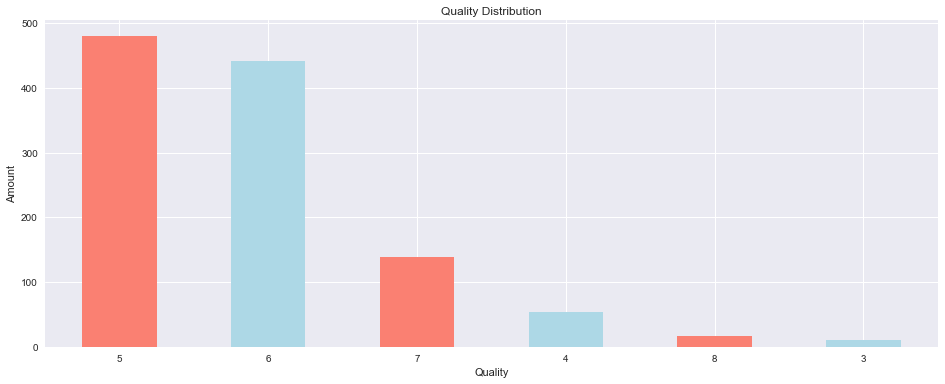

In [11]:
#Having a look at the visualization.
Quality.plot(kind = 'bar',figsize = (16,6),color = ('salmon','lightblue'))
plt.title('Quality Distribution')
plt.xlabel('Quality')
plt.ylabel('Amount')
plt.xticks(rotation= True);

* It shows like we have imblance distribution of target column.

In [12]:
#Importing required library to balance our dataset.
from imblearn.over_sampling import SMOTE

#Intializing SMOTE
ROS= SMOTE()
ROS

SMOTE()

In [13]:
#Having a look at the dataset now.
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5


In [14]:
#let's split dataset first.
x = df.drop('quality',axis = 1)
y = df['quality']

In [15]:
#Doing the resampling of our dependent and independent variables.
x_res,y_res = ROS.fit_resample(x,y)

In [16]:
#Having a look at the shape after resampling.
x_res.shape,y_res.shape

((2880, 11), (2880,))

* So as we can see, now we have equal amount of x and y we have. That means our dataset is now balanced.

In [17]:
#Assign new name as df1.
df = x_res

#Let's concat the x and y.
df["quality"] = y_res

#Having a look at the data.
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
1,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
2,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
3,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
4,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5


In [18]:
#Having a look at the target column now.
Quality = df['quality'].value_counts()
Quality

5    480
6    480
7    480
4    480
8    480
3    480
Name: quality, dtype: int64

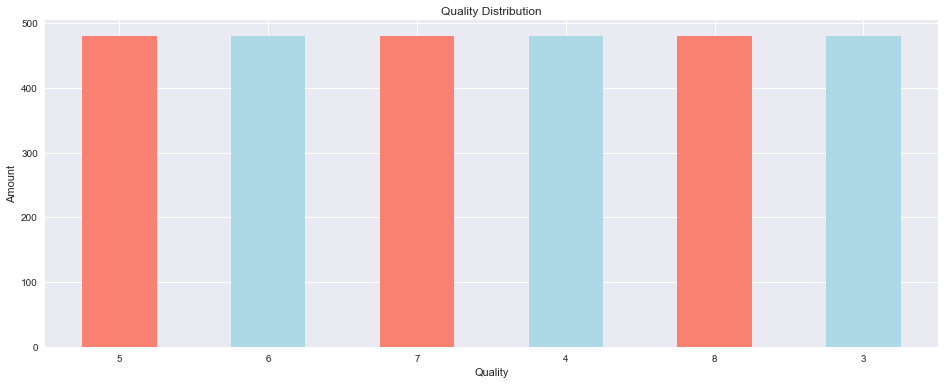

In [19]:
#Having a look at the visualization.
Quality.plot(kind = 'bar',figsize = (16,6),color = ('salmon','lightblue'))
plt.title('Quality Distribution')
plt.xlabel('Quality')
plt.ylabel('Amount')
plt.xticks(rotation= True);

* As we can see, now we have balance distribution in target column.


In [20]:
#Having a look at the data.
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
1,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
2,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
3,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
4,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5


In [21]:
#Having a look at the relation between Quality and fixed acidity.
quality_fixed_acidity_relation = pd.crosstab(df['quality'],df['fixed acidity'])
quality_fixed_acidity_relation

fixed acidity,4.600000,4.642657,4.671038,4.700000,4.900000,5.000000,5.030218,5.037849,5.059535,5.070429,...,13.426842,13.500000,13.792870,13.800000,14.000000,14.199018,14.300000,15.527775,15.600000,15.900000
quality,,,,,,,,,,,,,,,,,,,,,
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
6,0,0,0,1,0,3,0,0,0,0,...,0,0,0,1,1,0,1,0,0,0
7,0,0,0,0,1,0,0,0,0,0,...,1,0,1,0,0,1,0,1,1,0
8,0,0,0,0,0,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


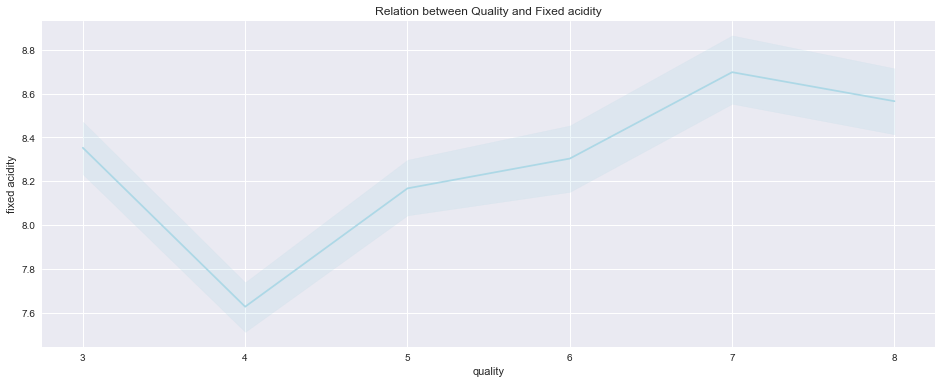

In [22]:
#Having a look at the visualization of Quality with Fixed acidity .
plt.figure(figsize = (16,6))
sns.lineplot(x = df['quality'],y = df['fixed acidity'],color = ('lightblue'))
plt.title('Relation between Quality and Fixed acidity');

* So from this graph we can say that the fixed acidity will vary for different quality of wines.

In [23]:
#Having a look at the dataset.
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
1,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
2,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
3,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
4,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5


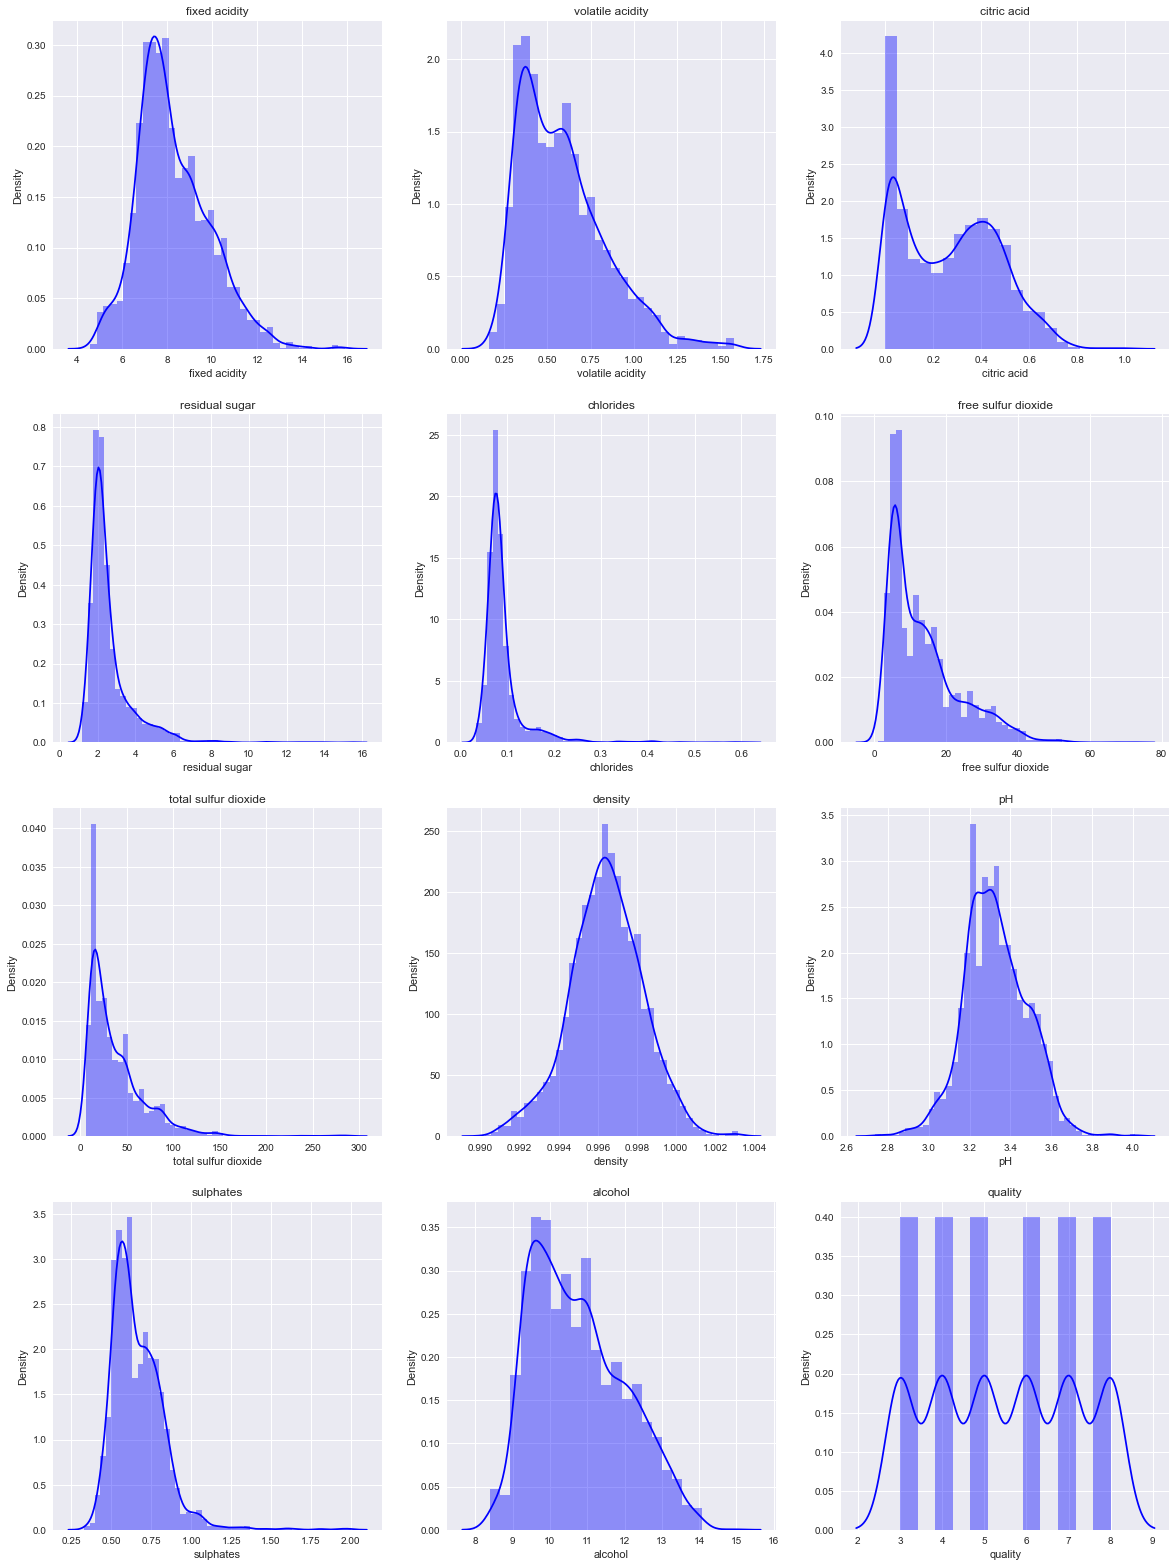

In [24]:
#Having a look at how our data is distributed.
plt.figure(figsize=(20,35))
for i in range(len(df.columns)):
    plt.subplot(5,3,i+1)
    sns.distplot(df[df.columns[i]],color='b')
    plt.title(df.columns[i])

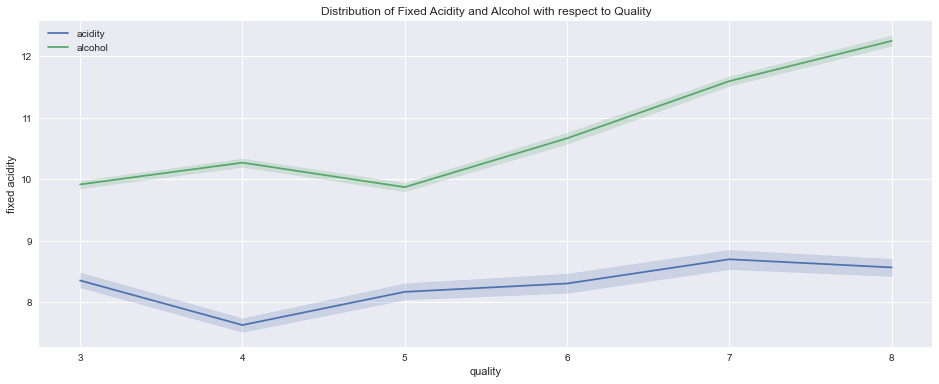

In [25]:
#Having a look at how our data is distributed.
plt.figure(figsize=(16,6))
sns.lineplot(x=df['quality'],y=df['fixed acidity'],label='acidity')
sns.lineplot(x=df['quality'],y=df['alcohol'],label='alcohol')
plt.title('Distribution of Fixed Acidity and Alcohol with respect to Quality')
plt.legend();

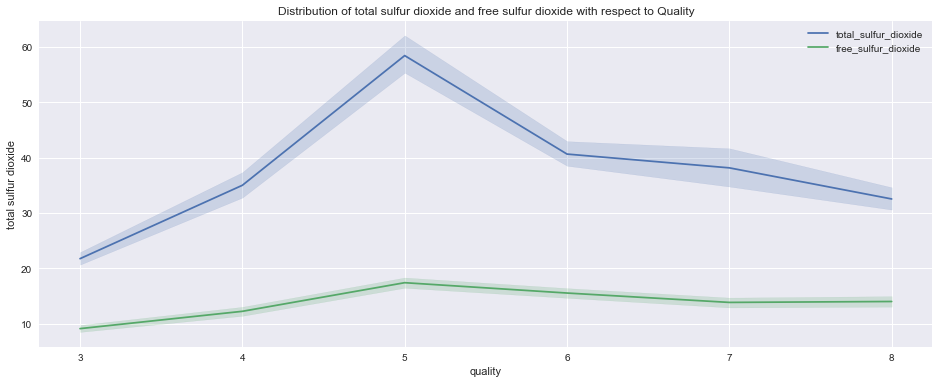

In [26]:
#Having a look at how our data is distributed.
plt.figure(figsize=(16,6))
sns.lineplot(x=df['quality'],y=df['total sulfur dioxide'] ,label='total_sulfur_dioxide')
sns.lineplot(x=df['quality'],y=df['free sulfur dioxide'] ,label='free_sulfur_dioxide')
plt.title('Distribution of total sulfur dioxide and free sulfur dioxide with respect to Quality')
plt.legend();

In [27]:
#Having a look at the relation between Quality and volatile acidity.
quality_fixed_acidity_relation = pd.crosstab(df['quality'],df['volatile acidity'])
quality_fixed_acidity_relation

volatile acidity,0.160000,0.180000,0.190000,0.200000,0.200912,0.202174,0.206003,0.206511,0.209805,0.210000,...,1.540429,1.547174,1.551469,1.562144,1.564188,1.572393,1.572499,1.575355,1.577406,1.580000
quality,,,,,,,,,,,,,,,,,,,,,
3,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,2,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,2,2,1,1,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
7,0,1,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


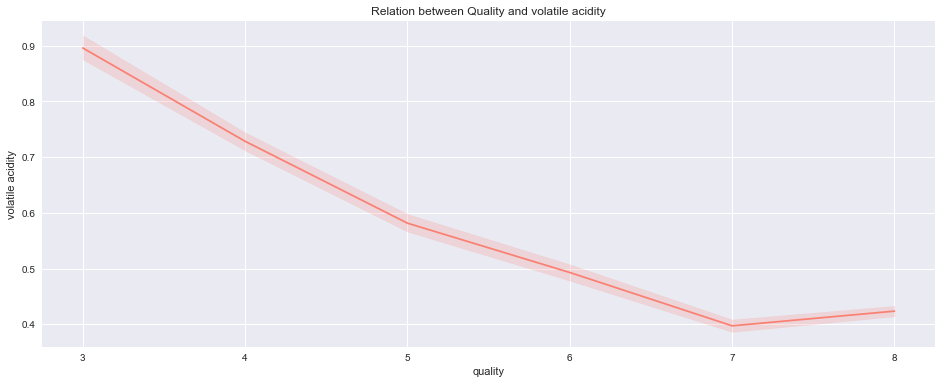

In [28]:
#Having a look at the visualization of Quality and volatile acidity.
plt.figure(figsize = (16,6))
sns.lineplot(x = df['quality'],y = df['volatile acidity'],color = ('salmon'))
plt.title('Relation between Quality and volatile acidity');

* So from this graph we can state that:
    1. Higher Quality of wine has lower amount of volatile acidity.
    2. Lower Quality of wine has higher amount of volatile acidity.
    
    
* Based on this we cas say that as quality increases volatile acidity decreases.

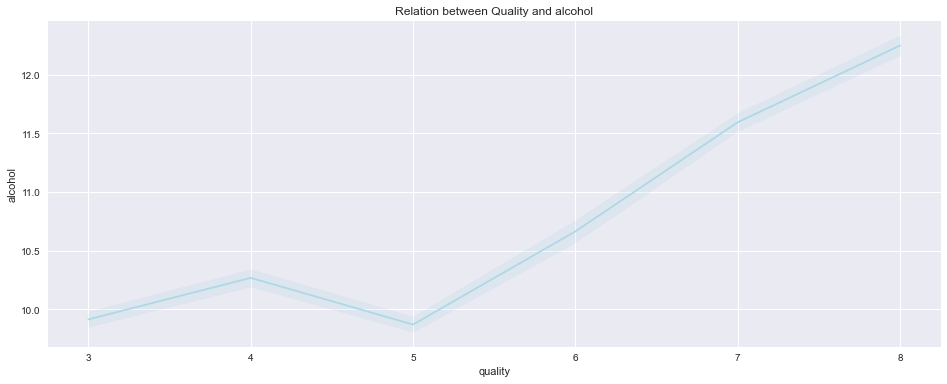

In [29]:
#Having a look at the visualization of Quality and alcohol.
plt.figure(figsize = (16,6))
sns.lineplot(x = df['quality'],y = df['alcohol'],color = ('lightblue'))
plt.title('Relation between Quality and alcohol');

* So from this graph we can state that:
        1) Higher Quality of wine has the Higher amount of alcohol involve.
        2) Lower quality of wine has Lower amount of alcohol involve.
        
* Based on this we cas say that as Quality increases alcohol quantity also increases.        

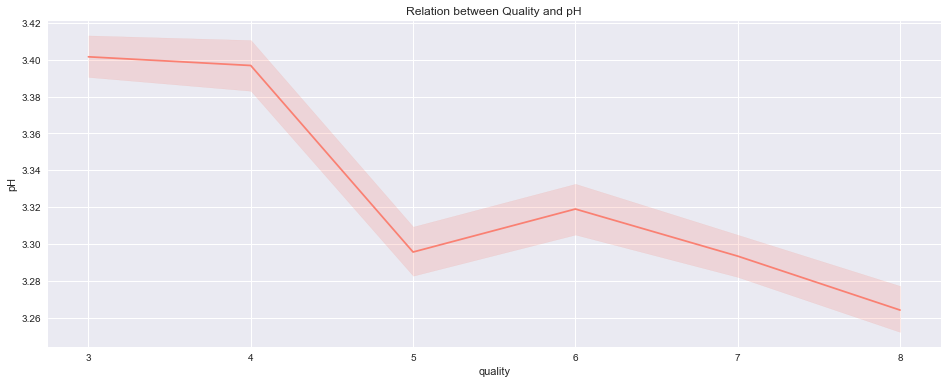

In [30]:
#Having a look at the visualization of Quality and pH.
plt.figure(figsize = (16,6))
sns.lineplot(x = df['quality'],y = df['pH'],color = ('salmon'))
plt.title('Relation between Quality and pH');

* So from this graph we can state that:
        1) Higher Quality of wine has the Lower PH Value.
        2) Lower quality of wine has Higher PH Value.
        
* Based on this we cas say that as Quality increases PH value decreases.  

In [31]:
#Having a look at the data now.
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
1,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
2,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
3,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
4,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5


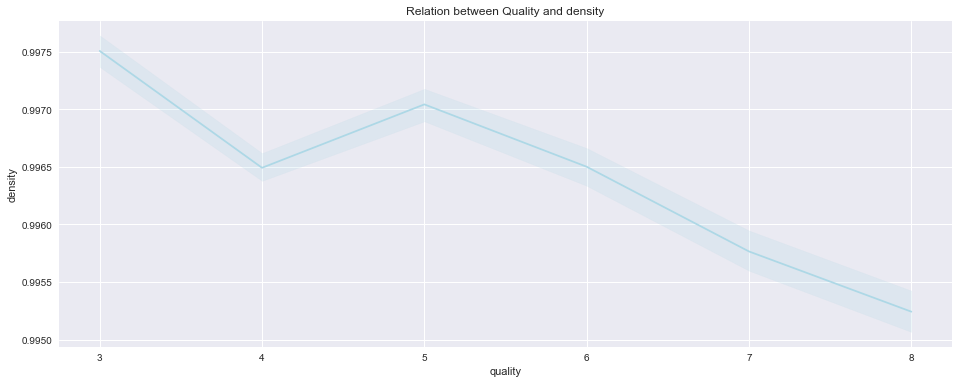

In [32]:
#Having a look at the visualization of Quality and density.
plt.figure(figsize = (16,6))
sns.lineplot(x = df['quality'],y = df['density'],color = ('lightblue'))
plt.title('Relation between Quality and density');

* So from this graph we can state that:
        1) Higher Quality of wine has the Lower Density Value.
        2) Lower quality of wine has Density PH Value.
        
* Based on this we cas say that as Quality increases Density value will decreases.  

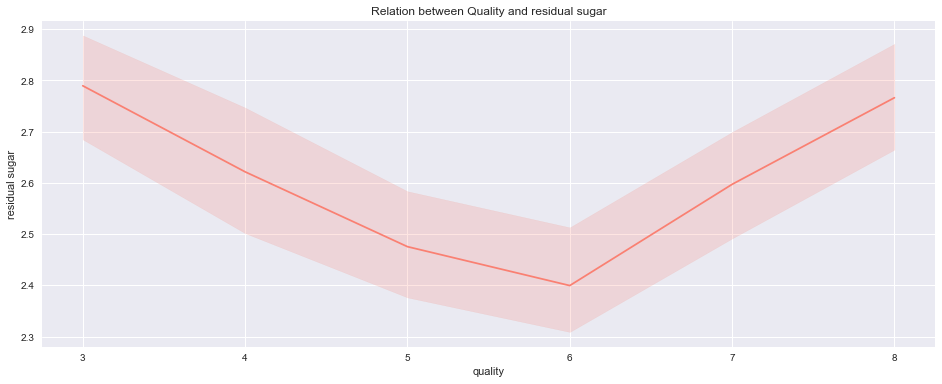

In [33]:
#Having a look at the visualization of Quality and residual sugar.
plt.figure(figsize = (16,6))
sns.lineplot(x = df['quality'],y = df['residual sugar'],color = ('salmon'))
plt.title('Relation between Quality and residual sugar');

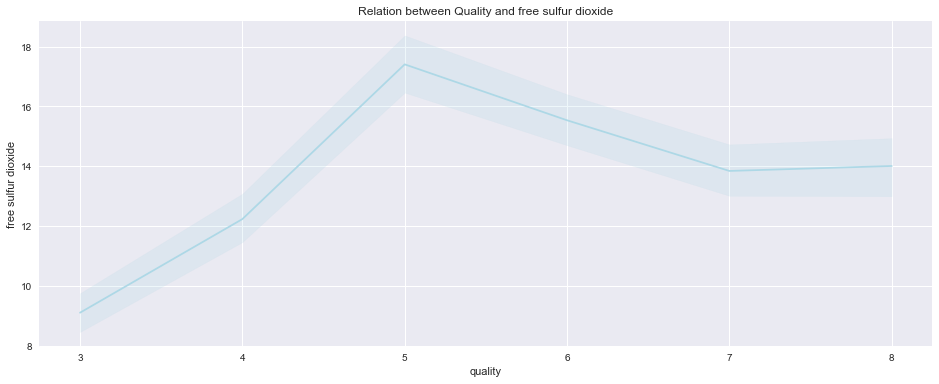

In [34]:
#Having a look at the visualization of Quality and free sulfur dioxide.
plt.figure(figsize = (16,6))
sns.lineplot(x = df['quality'],y = df['free sulfur dioxide'],color = ('lightblue'))
plt.title('Relation between Quality and free sulfur dioxide');

Text(0.5, 1.0, 'Relation between Quality and sulphates')

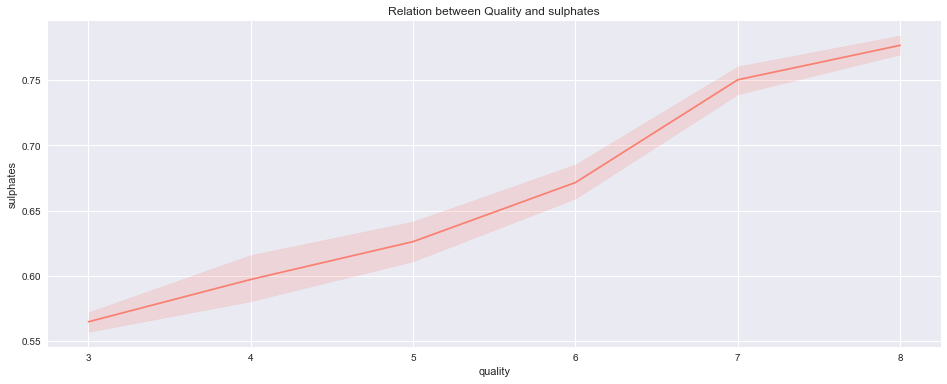

In [35]:
#Having a look at the visualization of Quality and sulphates.
plt.figure(figsize = (16,6))
sns.lineplot(x = df['quality'],y = df['sulphates'],color = ('salmon'))
plt.title('Relation between Quality and sulphates')

* So from this graph we can state that:
        1) Higher Quality of wine has the Higher amount of sulphates inside the wine.
        2) Lower quality of wine has Lower amount of sulphates inside the wine.
        
* Based on this we cas say that as Quality increases amount of sulphates inside the wine increases.  

# Data Preprocessing

In [36]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
1,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
2,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
3,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
4,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5


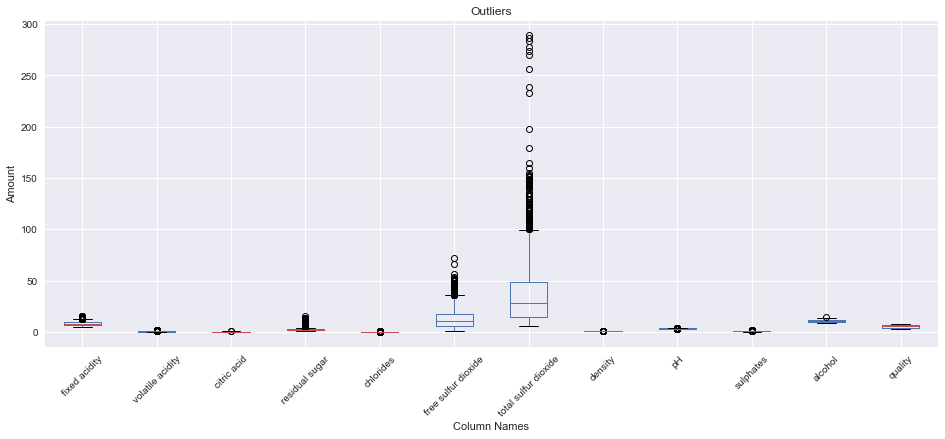

In [37]:
#Having a look at the outliers.
df.boxplot(figsize = (16,6))
plt.title('Outliers')
plt.xlabel('Column Names')
plt.ylabel('Amount')
plt.xticks(rotation = 45);

* It shows we have outliers in our dataset.

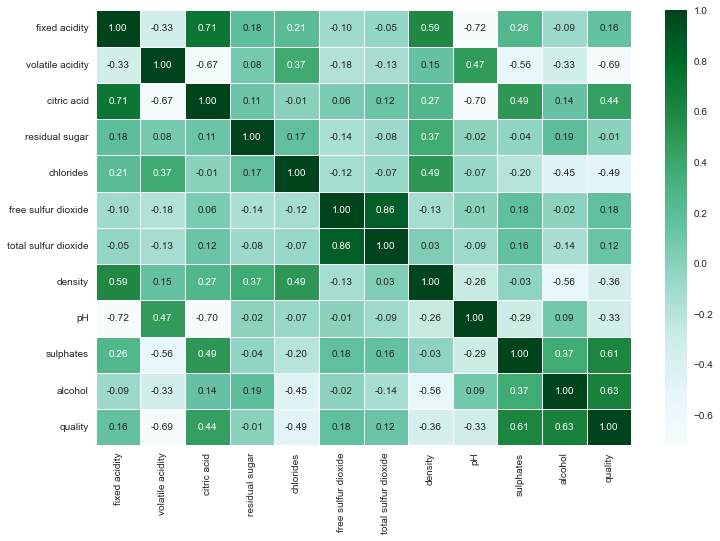

In [38]:
#Having a look at the relation using correlation matrix.
plt.figure(figsize = (12,8))
sns.heatmap(df.corr('spearman'),
            annot= True,
            linewidths= '0.5',
            fmt = '0.2f',
            cmap = 'BuGn');

* Here we can see:

    1) Higher the positive values shows the higher the positive correlation.
    
    2) Higher the negative values shows the higher the negative correlation. 
    
    3) Values near zero shows no relation.

In [39]:
#Having a look at the data.
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
1,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
2,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
3,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
4,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5


In [40]:
#Let's remove the values which shows no relation with target col.
df.drop('residual sugar',axis = 1,inplace = True)

In [41]:
#Having a look at the dataset now.
df.head()

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.8,0.88,0.00,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
1,7.8,0.76,0.04,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
2,11.2,0.28,0.56,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
3,7.4,0.66,0.00,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
4,7.9,0.60,0.06,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5


* As we can see, residual sugar column is removed from our dataset.

# Model Selection

In [42]:
#Importing Required libraries.
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,precision_score,recall_score,classification_report,plot_roc_curve

In [43]:
#let's split dependent and independent variable.
x = df.drop('quality',axis = 1)
y = df['quality']

In [44]:
#Split the data into train and test.
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state= 123)

In [45]:
#Having a look at the shape of train and test.
print("x_train : ",x_train.shape)
print("x_test : ",x_test.shape)
print("y_train : ",y_train.shape)
print("y_test : ",y_test.shape)

x_train :  (2304, 10)
x_test :  (576, 10)
y_train :  (2304,)
y_test :  (576,)


# Model Evaluation

In [46]:
#Selecting Models.
models = {"logistic Regression" : LogisticRegression(solver = "liblinear"),
          "Random Forest" : RandomForestClassifier(n_estimators = 100),
          "Adaboost" : AdaBoostClassifier(),
          "GradientBoost": GradientBoostingClassifier(),
          "KNN" : KNeighborsClassifier(),
          "SVM" : SVC(kernel='linear',C = 10)}

models

{'logistic Regression': LogisticRegression(solver='liblinear'),
 'Random Forest': RandomForestClassifier(),
 'Adaboost': AdaBoostClassifier(),
 'GradientBoost': GradientBoostingClassifier(),
 'KNN': KNeighborsClassifier(),
 'SVM': SVC(C=10, kernel='linear')}

In [47]:
#Here fit the train and test data inside model and finding score.
def fit_and_score(models,x_train,x_test,y_train,y_test):
    
    np.random.seed(42)
    
    model_scores_train = {}
    
    model_scores_test = {}
    
    for name, model in models.items():
        
        model.fit(x_train,y_train)
        
        model_scores_train[name] = model.score(x_train,y_train)
        
        model_scores_test[name] = model.score(x_test,y_test)
        
    return model_scores_test      

In [48]:
#Having a look at which model is performing well for given dataset.
fit_and_score = fit_and_score(models = models,
              x_train = x_train,
              x_test = x_test,
              y_train = y_train,
              y_test = y_test)

fit_and_score

{'logistic Regression': 0.5815972222222222,
 'Random Forest': 0.8420138888888888,
 'Adaboost': 0.3263888888888889,
 'GradientBoost': 0.8090277777777778,
 'KNN': 0.6579861111111112,
 'SVM': 0.6163194444444444}

* As we can see Random Forest Classifier is performing pretty well on given dataset as compare to other models.

In [49]:
#fiting model score inside dataframe.
fit_and_score = pd.DataFrame(fit_and_score, index = ["Accuracy"])

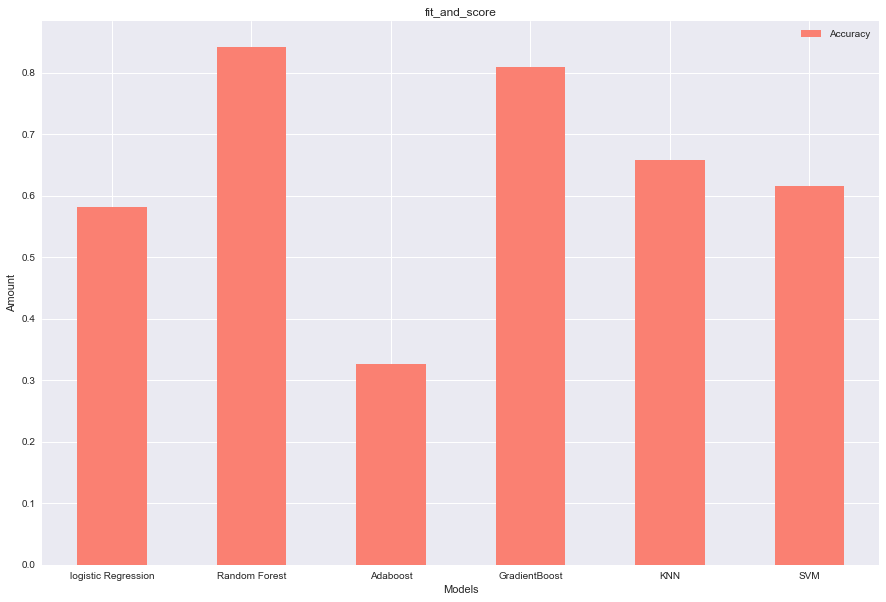

In [50]:
#Visualizing model score.
fit_and_score.T.plot(kind = "bar", figsize = (15,10), color = ["salmon"])
plt.title("fit_and_score")
plt.xlabel("Models")
plt.ylabel("Amount")
plt.xticks(rotation = 0);

## Hyperparameter Tuning using RandomizedSearchCV

we're going to tune:

* Randomforestclassifier()
* logisticRegression()

... using RandomizedSearchCV

In [51]:
#Creating Hyperparameter Grid for logistic Regression.
log_reg = {"C" : np.logspace(-4,4,20),
           "solver" : ["liblinear"]}

#Creating Hyperparameter Grid for Random Forest.
ran_forest = {"n_estimators" : np.arange(1,1000,50),
           "max_depth"    : [None,3,5,20],
           "min_samples_leaf" : np.arange(2,20,2),
           "min_samples_split" : np.arange(1,20,2)}

In [52]:
#Here we are doing Hyperparameter Tuning with the help of RandomizedSearchCV.
ran_cv_RFC = RandomizedSearchCV(RandomForestClassifier(n_estimators=100),
                                param_distributions = ran_forest,
                                cv = 5,
                                n_iter = 100,
                                verbose = True)

In [53]:
#fiting train data inside tuned model.
ran_cv_RFC.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 20],
                                        'min_samples_leaf': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'min_samples_split': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'n_estimators': array([  1,  51, 101, 151, 201, 251, 301, 351, 401, 451, 501, 551, 601,
       651, 701, 751, 801, 851, 901, 951])},
                   verbose=True)

In [54]:
#Having look at score of tuned model.
ran_cv_RFC.score(x_test,y_test)

0.8211805555555556

# Model Prediction

In [55]:
#Making prediction with the help of tuned model and x test data.
y_pred = ran_cv_RFC.predict(x_test)
y_pred

array([3, 8, 3, 3, 4, 3, 8, 8, 4, 4, 3, 4, 5, 3, 3, 3, 5, 4, 3, 7, 4, 7,
       5, 7, 7, 5, 3, 5, 5, 8, 5, 3, 7, 3, 3, 3, 5, 8, 5, 7, 3, 8, 5, 5,
       7, 8, 7, 7, 6, 8, 4, 7, 6, 3, 4, 8, 4, 6, 6, 8, 7, 7, 3, 5, 3, 8,
       6, 8, 7, 5, 3, 4, 4, 4, 3, 7, 7, 5, 5, 7, 8, 6, 4, 7, 5, 7, 8, 4,
       6, 3, 8, 4, 3, 8, 5, 7, 6, 5, 5, 7, 7, 8, 4, 3, 5, 8, 7, 3, 6, 6,
       4, 8, 6, 6, 7, 8, 4, 4, 8, 3, 4, 7, 3, 5, 5, 5, 4, 7, 4, 8, 4, 6,
       6, 6, 7, 8, 8, 4, 6, 5, 8, 8, 5, 3, 5, 3, 6, 7, 3, 4, 5, 8, 8, 7,
       8, 7, 3, 5, 7, 5, 7, 4, 8, 3, 8, 7, 4, 5, 4, 6, 3, 5, 3, 3, 3, 4,
       5, 8, 3, 5, 5, 5, 4, 5, 8, 4, 4, 8, 7, 4, 3, 5, 8, 5, 3, 3, 5, 7,
       6, 6, 7, 7, 4, 8, 5, 4, 5, 7, 6, 6, 7, 7, 4, 6, 5, 3, 3, 5, 8, 6,
       3, 7, 3, 3, 7, 8, 6, 3, 4, 6, 4, 5, 6, 7, 3, 5, 7, 3, 3, 8, 7, 5,
       7, 4, 8, 3, 8, 6, 4, 7, 4, 8, 8, 3, 3, 3, 5, 3, 6, 7, 5, 4, 7, 7,
       7, 8, 3, 3, 5, 8, 7, 8, 5, 8, 3, 5, 6, 7, 4, 6, 7, 7, 6, 3, 8, 4,
       4, 7, 8, 8, 4, 7, 4, 6, 4, 8, 4, 8, 8, 4, 4,

In [56]:
#Having look at confusion metrix.
print(confusion_matrix(y_test,y_pred))

[[ 98   0   0   0   0   0]
 [  2  88   4   2   0   0]
 [  2   8  61   9   3   0]
 [  0   8  28  41  19   1]
 [  0   0   2  11  85   4]
 [  0   0   0   0   0 100]]


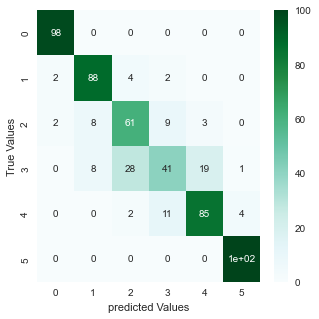

In [57]:
#visualizing the confusion metrix.
def plot_cof_met(y_test,y_pred):
    
    fig,ax = plt.subplots(figsize = (5,5))
    
    ax = sns.heatmap(confusion_matrix(y_test,y_pred),
                     annot = True,
                     cmap = "BuGn")
    
    plt.xlabel("predicted Values")
    plt.ylabel("True Values")
    
    
plot_cof_met(y_test,y_pred) 

In [58]:
#Having look at classification report.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.96      1.00      0.98        98
           4       0.85      0.92      0.88        96
           5       0.64      0.73      0.69        83
           6       0.65      0.42      0.51        97
           7       0.79      0.83      0.81       102
           8       0.95      1.00      0.98       100

    accuracy                           0.82       576
   macro avg       0.81      0.82      0.81       576
weighted avg       0.81      0.82      0.81       576



* As we see our model is giving us 82% of accuracy.

In [59]:
#Here we are finding the best parameter from gd_log_reg model.
ran_cv_RFC.best_params_

{'n_estimators': 701,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_depth': 20}

In [60]:
clf = RandomForestClassifier(n_estimators = 751,
 min_samples_split= 5,
 min_samples_leaf= 2,
 max_depth= 20)

clf.fit(x_train,y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=751)

In [61]:
#Having a look at coefficient.
print(clf.feature_importances_)

[0.06439142 0.14572861 0.06234857 0.11353314 0.07625961 0.11422669
 0.06770041 0.07240979 0.12760078 0.15580098]


In [62]:
#Having look at which column contributed more in the prediction.
con_byu = dict(zip(x_train.columns,clf.feature_importances_))
con_byu

{'fixed acidity': 0.0643914202409038,
 'volatile acidity': 0.14572860787637187,
 'citric acid': 0.062348571946618164,
 'chlorides': 0.11353314459327325,
 'free sulfur dioxide': 0.07625960873434331,
 'total sulfur dioxide': 0.11422668867434106,
 'density': 0.0677004062748801,
 'pH': 0.07240979013647626,
 'sulphates': 0.12760077716098625,
 'alcohol': 0.1558009843618061}

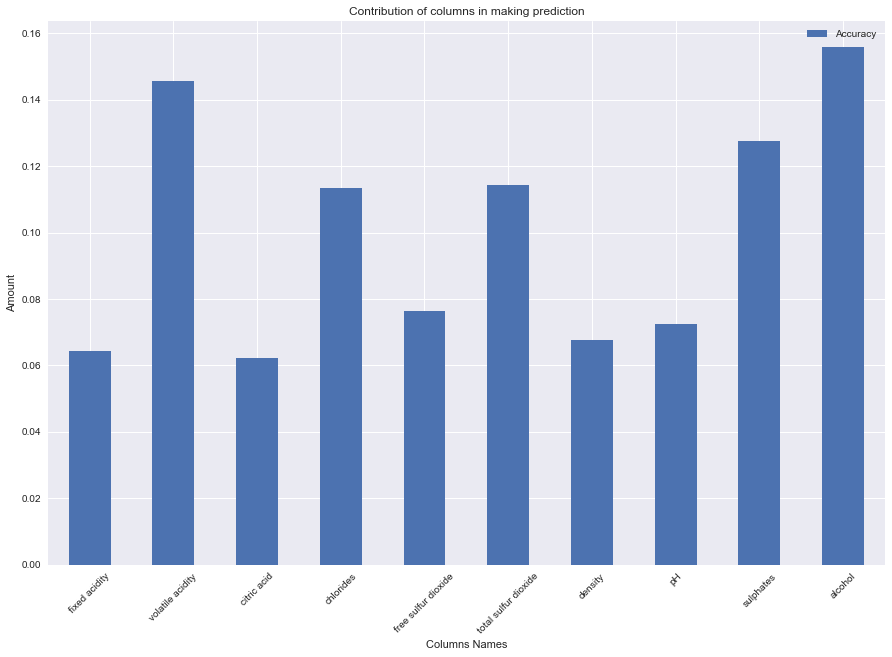

In [63]:
#Visualization.
con_byu = pd.DataFrame(con_byu , index = ["Accuracy"])
con_byu.T.plot(kind = "bar" , figsize = (15,10))
plt.title("Contribution of columns in making prediction")
plt.xlabel("Columns Names")
plt.ylabel("Amount")
plt.xticks(rotation = 45);

* Here Features Importance show which feature contributing how much in prediction.
* Feature that are contributing more in prediction are:
    * volatile acidity
    * chlorides
    * total sulfur dioxide
    * sulphates
    * alcohol